In [ ]:
!pip install catboost
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_percentage_error,mean_absolute_error
import numpy as np




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.6 MB/s eta 0:00:00


In [ ]:
df=pd.read_csv('/content/station_data_dataverse3.csv')




In [ ]:
df['distance']=df['distance'].fillna(df['distance'].mean())

In [ ]:
label_encoder = LabelEncoder()
df['weekday'] = label_encoder.fit_transform(df['weekday'])
df['platform'] = label_encoder.fit_transform(df['platform'])



In [ ]:
# Define features and target
X = df[
    ['chargeTimeHrs', 'startTime', 'endTime', 'weekday', 'managerVehicle','distance'] +
    [ 'userId', 'stationId', 'locationId']
]
y = df['kwhTotal']



In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [ ]:
# Initialize and train the CatBoost Regressor
catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=8, random_state=0, verbose=0)
catboost_model.fit(X_train, y_train, eval_set=(X_test,y_test))



In [ ]:
# Predict on the test set
y_pred = catboost_model.predict(X_test)



In [ ]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape=mean_absolute_percentage_error(y_test, y_pred)
print("MAPE:", mape)
r2 = r2_score(y_test, y_pred)



MAPE: 20366139109612.547


In [ ]:
# Print the results
print("RMSE:", rmse)
print("R² Score:", r2)
print("MAPE:",mean_absolute_percentage_error(y_test, y_pred))
print("MAE:",mean_absolute_error(y_test, y_pred))

RMSE: 1.3752316278526864
R² Score: 0.8027484018527744
MAPE: 20366139109612.547
MAE: 0.8993059025769053


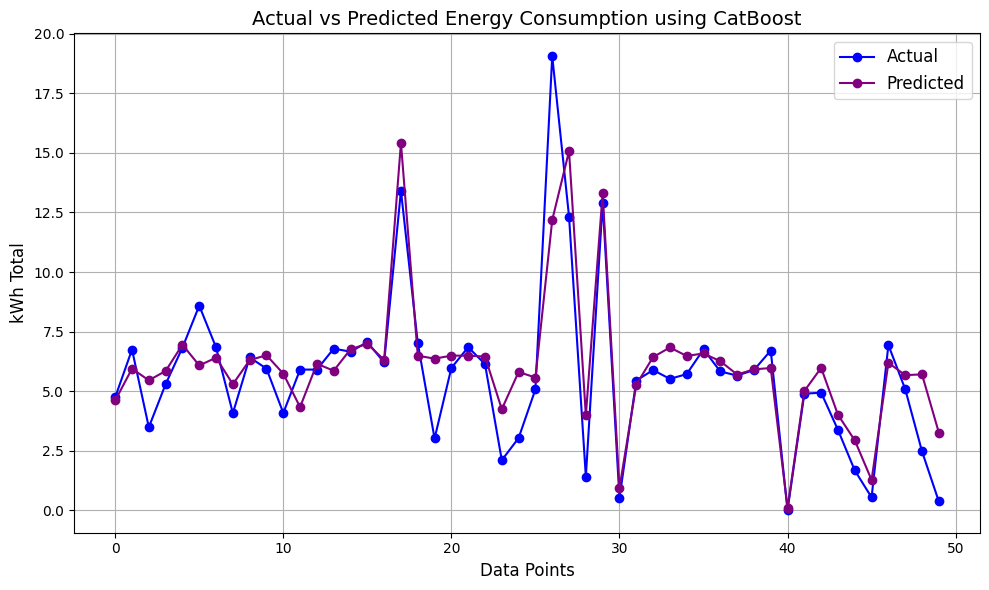

In [ ]:
import matplotlib.pyplot as plt

# Plotting Actual vs Predicted on the same graph
plt.figure(figsize=(10, 6))

# Plot actual values
plt.plot(y_test.values[:50], label="Actual", color="blue", marker="o", linestyle="-")

# Plot predicted values
plt.plot(y_pred[:50], label="Predicted", color="purple", marker="o", linestyle="-")

# Add title and labels
plt.title("Actual vs Predicted Energy Consumption using CatBoost", fontsize=14)
plt.xlabel("Data Points", fontsize=12)
plt.ylabel("kWh Total", fontsize=12)

# Add legend and grid
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()
